Stress
Data on past-year stress exposure (section: mental health) at baseline and follow-up (3 time points: follow-up questionnaire 1 and 2 and questionnaire at second assessment).
Two stress exposure questionnaires were administered: the List of Threatening Experiences (LTE) measuring acute stressful life events (or SLE), and the Long-term Difficulties Inventory
(LDI) measuring long-term difficulties (LTD) i.e. more chronic stressors. The questionnaires were part of the questionnaire packs to be administered at home. Both concern stressors in the past year. The validation and the reliability of the LDI was performed in a study by Rosmalen et al.
The LTE lists 12 stressful life events (e.g. death of a relative, serious disease) and asks whether participants experienced such an event in the past year (no=2, yes=1). Items 13 (“did you
experience any other major life events in the past year?”) and 13A (“can you briefly describe this event?”) are discarded.
The LDI lists 12 potential sources of chronic stress (e.g. financial difficulties, work-related stress, strained relationships) and asks how much the participant was affected by this type of stress
(not=1, somewhat=2, much=3). Variable Label
LTE_SUM_T1 Total number of stressful life events that happened to participant in the past year at baseline as mean (T1)
LDI_SUM_T1 Total amount of stress from long-term/chronic stressors experienced by the participant at baseline as mean (T1)
LTE_SUM_T2 Total number of stressful life events that happened to participant in the past year at second assessment as mean (T2)
LDI_SUM_T2 Total amount of stress from long-term/chronic stressors experienced by the participant at second assessment as mean (T2)

In [2]:
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization 
from matplotlib import pyplot as pp
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.tools as tls
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics
import yaml
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Load the configuration file
with open("config.yml", "r") as reader:
    config = yaml.safe_load(reader)

# Load data from the configuration
file = config['path']
df_zipcode = pd.read_csv(file, delimiter='\t', encoding='utf-16le')

file = config['path_general']
df_zipcode_general= pd.read_csv(file, delimiter='\t', encoding='utf-16le')

In [99]:
# Select appropriate columns from the dataframe.
new_general = df_zipcode_general[['ZIPCODE','GENDER_FEMALE','GENDER_MALE', 'AGE_CAT', 'AGE_T1',
             'MWK_VAL', 'SCOR_VAL', 'MWK_NO_VAL', 'SCOR_NO_VAL', 
             'SPORTS_T1','LTE_SUM_T1', 'LDI_SUM_T1', 
             'LTE_SUM_T2', 'LDI_SUM_T2']]
# Select appropriate columns from the dataframe.
new_zip = df_zipcode[['ZIPCODE', 'GENDER', 'AGE_CAT', 'AGE_T1',
             'MWK_VAL', 'SCOR_VAL', 'MWK_NO_VAL', 'SCOR_NO_VAL', 
             'SPORTS_T1','LTE_SUM_T1', 'LDI_SUM_T1', 
             'LTE_SUM_T2', 'LDI_SUM_T2']]
new_zip.iloc[:, 3:] = new_zip.iloc[:, 3:].apply(lambda x: x.str.replace(',', '.')).astype(float)

# Merge for oobtaining zipcodes.
new_df = new_general.merge(new_zip,on= 'ZIPCODE', how = 'inner')

# Remove duplicate columns.
new_df = new_df.drop(new_df.columns[new_df.columns.str.contains('_x')], axis=1)

# Remove "_y" from header names
new_df.rename(columns={col: col.rstrip('_y') for col in new_df.columns}, inplace=True)

# Drop the columns "GENDER_FEMALE" and "GENDER_MALE"
df = new_df.drop(['GENDER_FEMALE', 'GENDER_MALE'], axis=1)
df.head()

,ZIPCODE,GENDER,AGE_CAT,AGE_T1,MWK_VAL,SCOR_VAL,MWK_NO_VAL,SCOR_NO_VAL,SPORTS_T1,LTE_SUM_T1,LDI_SUM_T1,LTE_SUM_T2,LDI_SUM_T2
0,7741,1,8,43.35,610.36,3289.20,276.51,1619.94,52.11,1.25,2.28,0.82,1.90
1,7741,2,8,42.85,437.24,2227.82,245.62,1269.70,54.05,1.24,2.58,0.74,1.94
2,7742,1,8,43.42,533.71,2961.50,307.23,1829.12,61.11,0.98,2.28,0.62,1.79
3,7742,2,7,41.56,455.48,2310.45,259.01,1328.09,61.11,1.06,2.59,0.75,2.17
4,7751,1,8,44.02,356.03,2052.39,294.55,1744.98,59.61,1.05,1.91,0.57,1.43


In [25]:
colomn = df.columns
colomn

Index(['ZIPCODE', 'GENDER', 'AGE_CAT', 'AGE_T1', 'MWK_VAL', 'SCOR_VAL',
       'MWK_NO_VAL', 'SCOR_NO_VAL', 'SPORTS_T1', 'LTE_SUM_T1', 'LDI_SUM_T1',
       'LTE_SUM_T2', 'LDI_SUM_T2'],
      dtype='object')

MWK_VAL Minutes of weekly physical activity on moderate and vigorous intensity level
at baseline as mean (T1)

SCOR_VAL Score for weekly physical activity on moderate and vigorous intensity level,
based on the sum of minutes per activity times the intensity of the specific
activity at baseline as mean (T1)

MWK_NO_VAL Minutes of weekly physical activity on moderate and vigorous intensity level,
in leisure time and commuting domains (but not occupational) at baseline as
mean (T1

SCOR_NO_VAL Score for weekly physical activity on moderate and vigorous intensity level,
in leisure time and commuting domains (but not occupational), based on the
sum of minutes per activity times the intensity of the specific activity at
baseline as mean (T1)


-------------------------------------
LTE_SUM_T1 Total number of stressful life events that happened to participant in the past
year at baseline as mean (T1)

LDI_SUM_T1 Total amount of stress from long-term/chronic stressors experienced by the
participant at baseline as mean (T1)

LTE_SUM_T2 Total number of stressful life events that happened to participant in the past
year at second assessment as mean (T2)

LDI_SUM_T2 Total amount of stress from long-term/chronic stressors experienced by the
participant at second assessment as mean (T2)


# Descriptive Summary

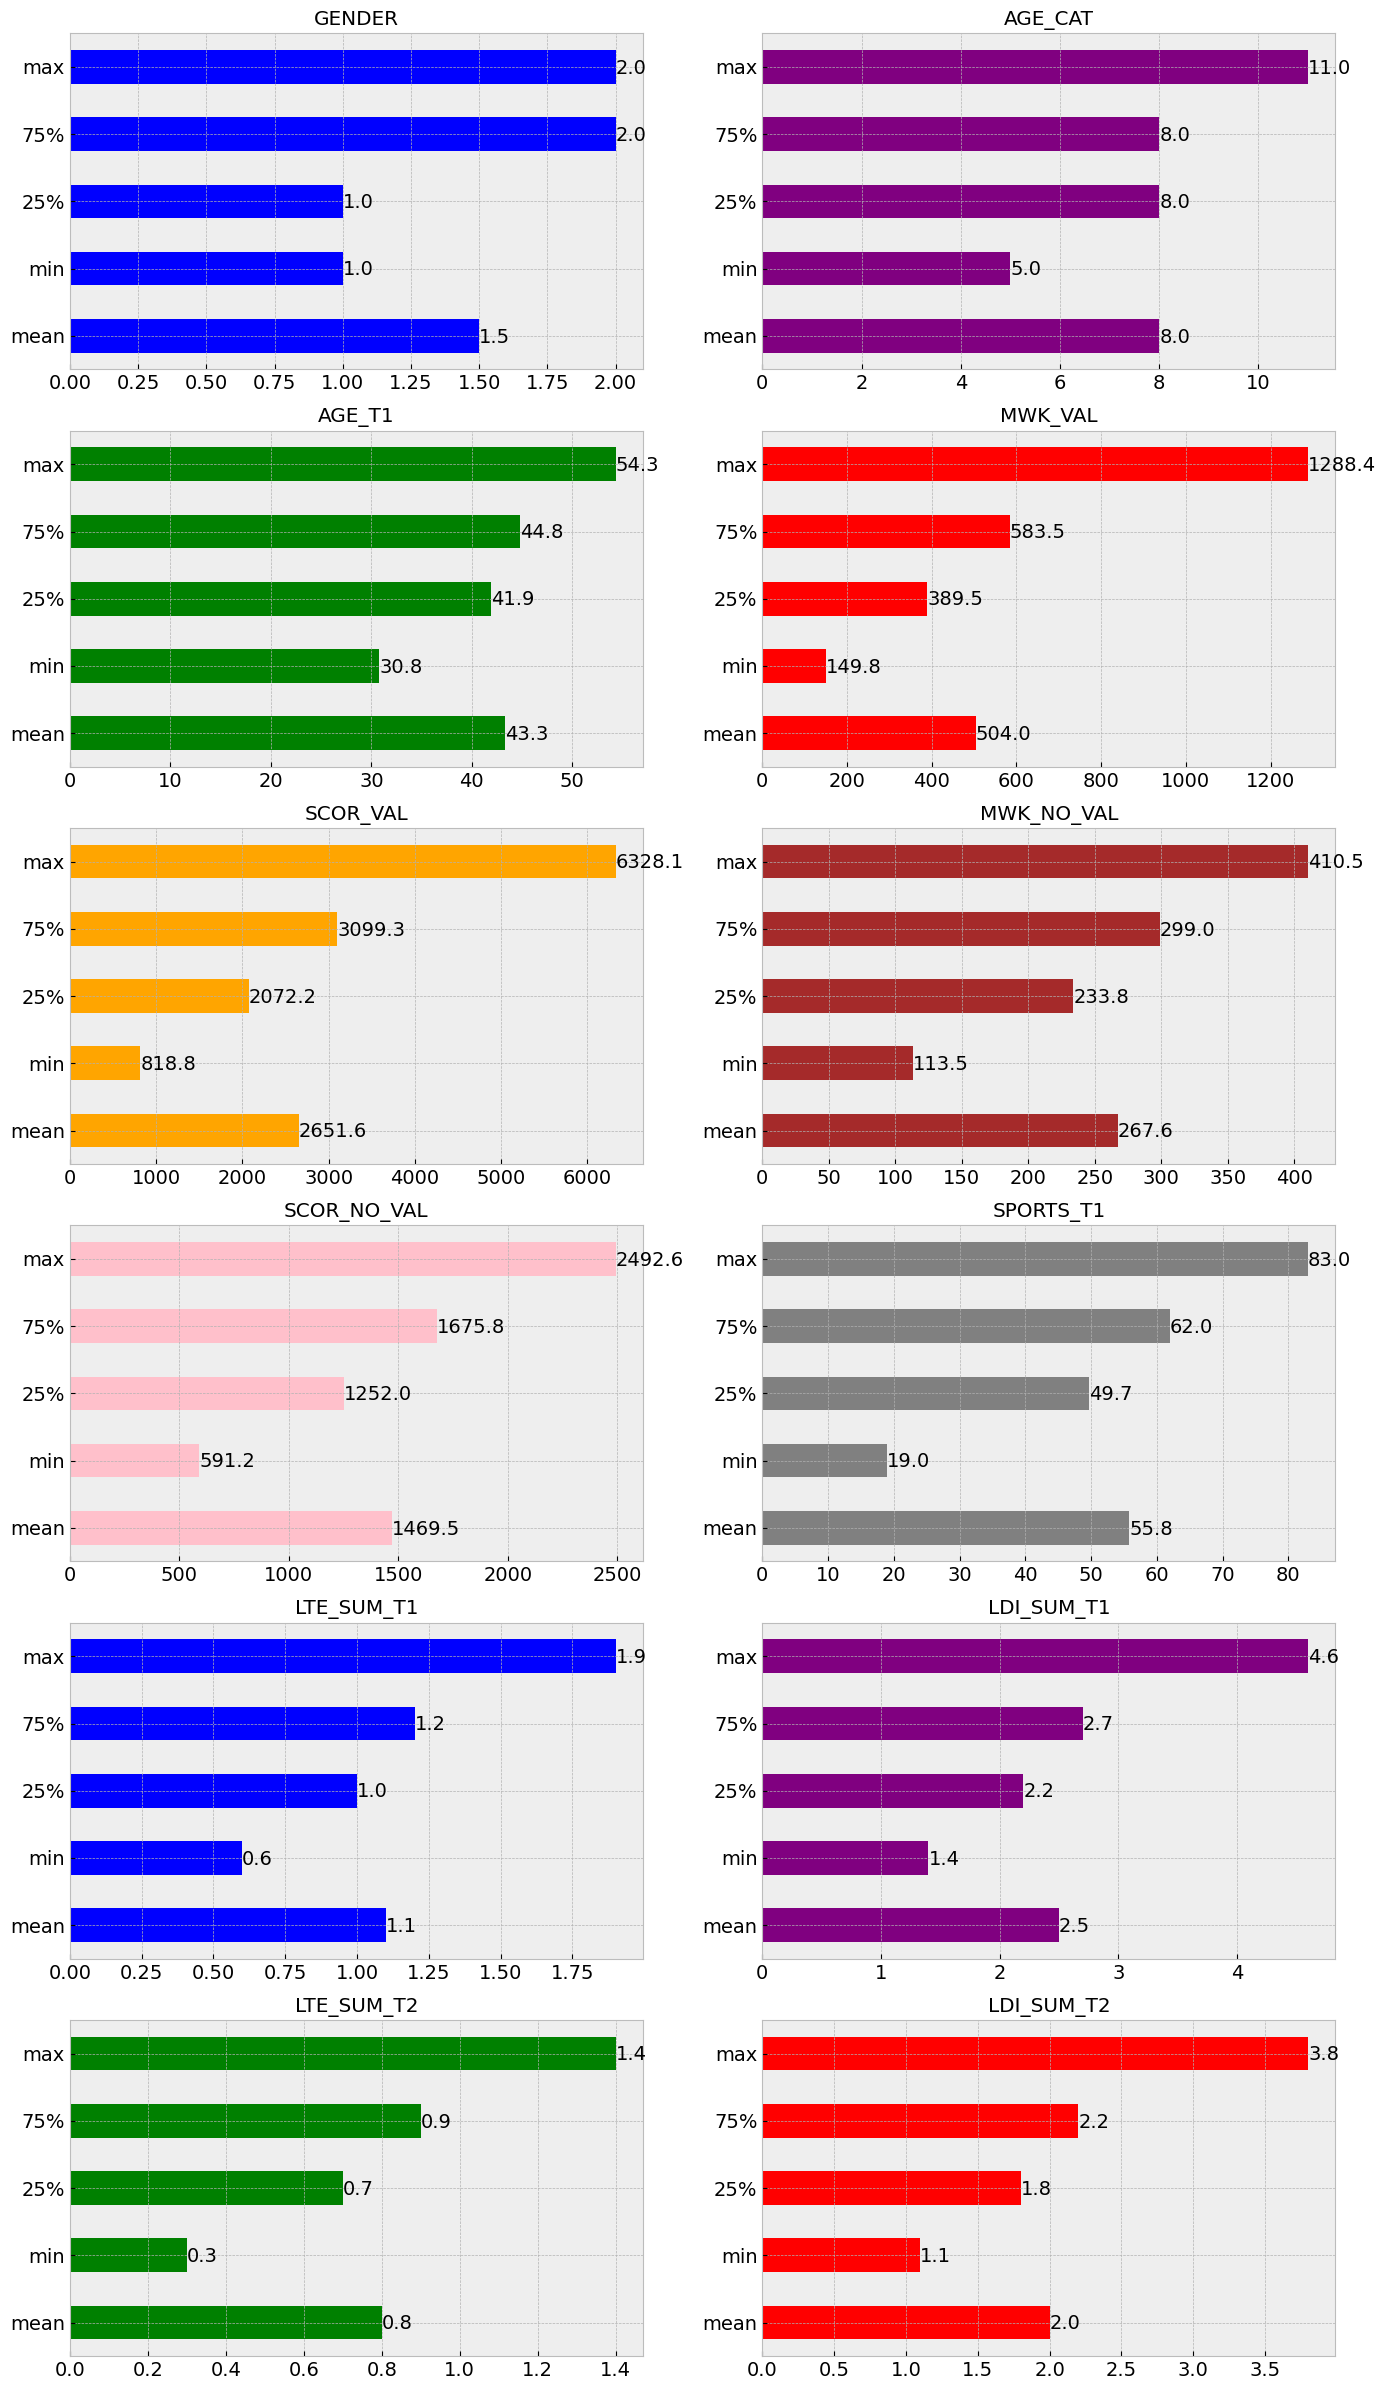

In [53]:
def descriptive(df):
    desc = df.drop('ZIPCODE', axis=1).describe().round(1).drop(['count', 'std', '50%'], axis=0)
    i = -0.1
    j = 0
    Row = int(round(len(desc.columns.tolist())/2 + 0.1))
    f, ax = plt.subplots(Row, 2, figsize=(28, 18))
    colors = ['blue', 'purple', 'green', 'red', 'orange', 'brown', 'pink', 'grey']
    c = 0
    for name in desc.columns.tolist():
        desc[name].plot(kind='barh', figsize=(14, 24), title=name, ax=ax[round(i), j], fontsize=14, color=colors[c%len(colors)])
        for k, v in enumerate(desc[name].tolist()):
            ax[round(i), j].text(v, k-0.1, str(v), color='black', size=14)
        i += 0.5
        if j == 0:
            j = 1
        else:
            j = 0
        c += 1
    f.tight_layout()

descriptive(new_df)


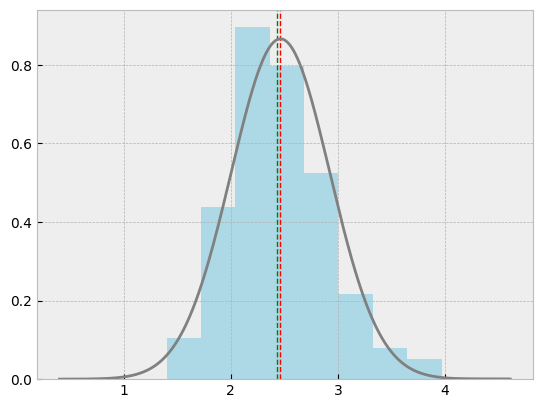

In [62]:

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

y = df['LDI_SUM_T1']

# Plot the distribution of the dependent variable
#ax = y.plot.hist(density=True) #other solution.
plt.hist(y, density=True, color='lightblue')

# Add a vertical line at the position of the average
mean = y.mean()
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)

# Add a vertical line for the robust estimation
robust = y.median()
plt.axvline(robust, color='g', linestyle='dashed', linewidth=1)

# plot a normal distribution line.
x = np.linspace(y.min()-1, y.max(), 1000)
mu, std = norm.fit(y)
yr = norm.pdf(x, mu, std)
plt.plot(x, yr, 'gray', linewidth=2)

plt.show()



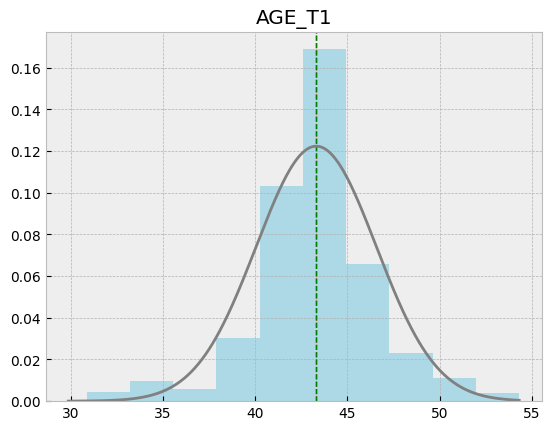

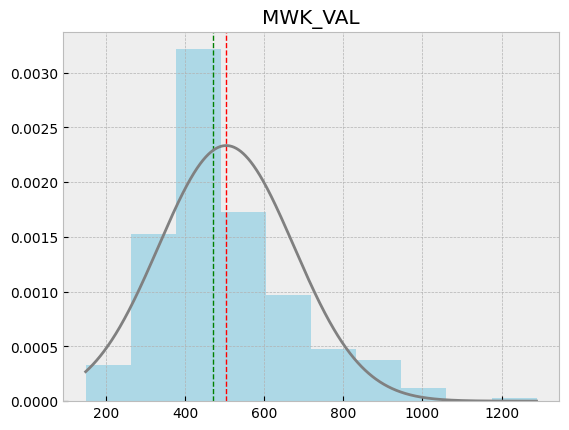

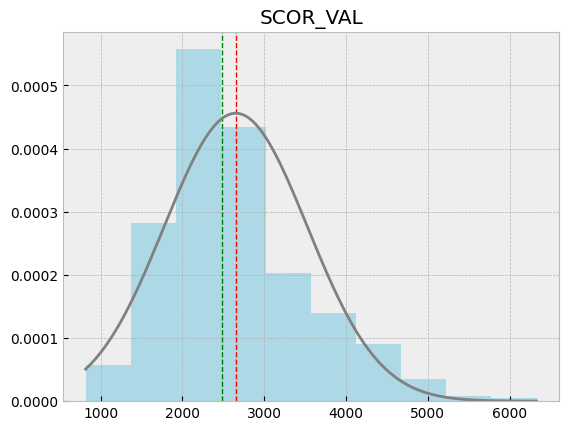

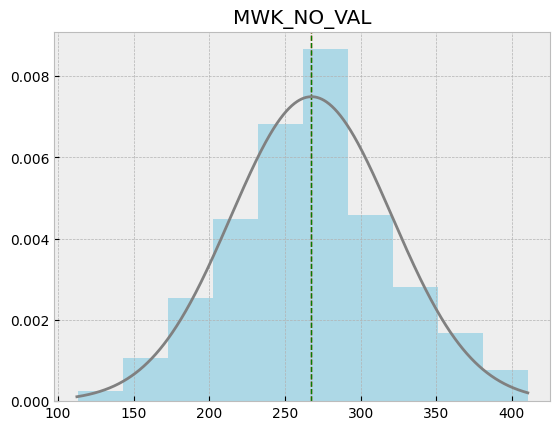

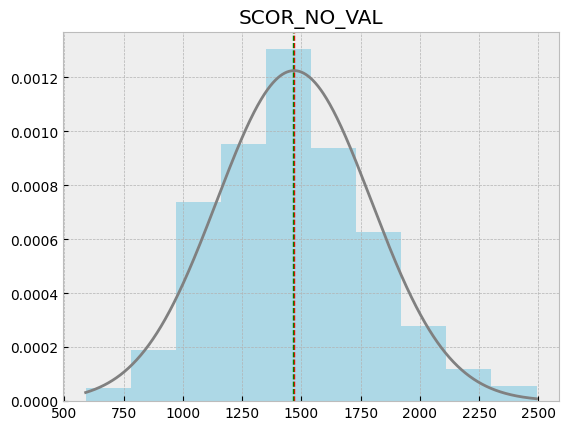

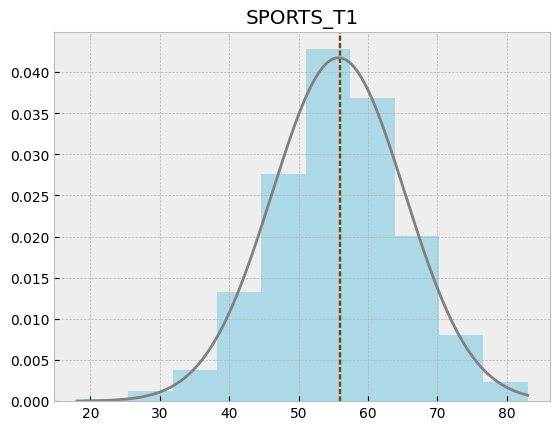

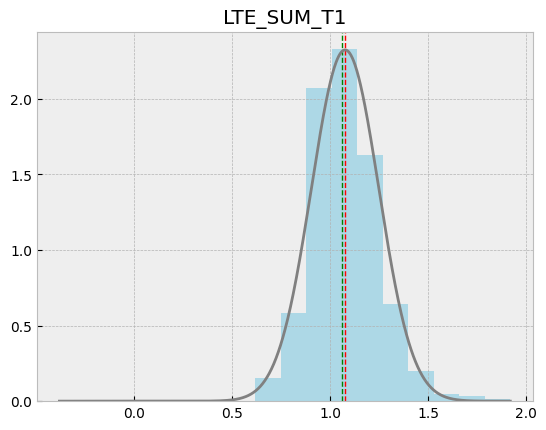

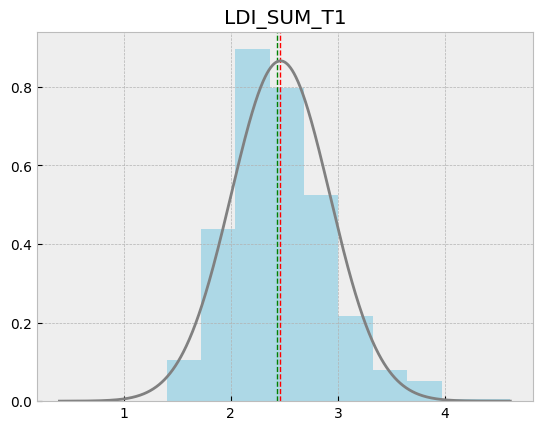

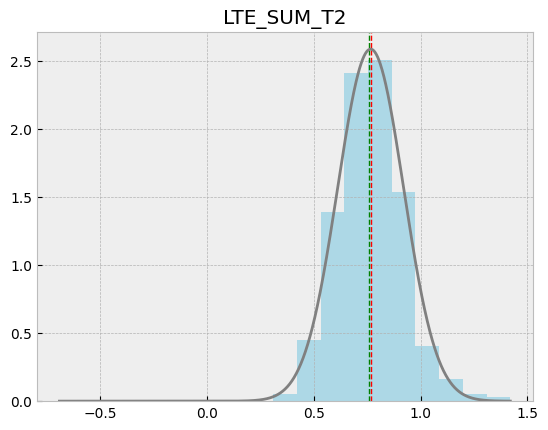

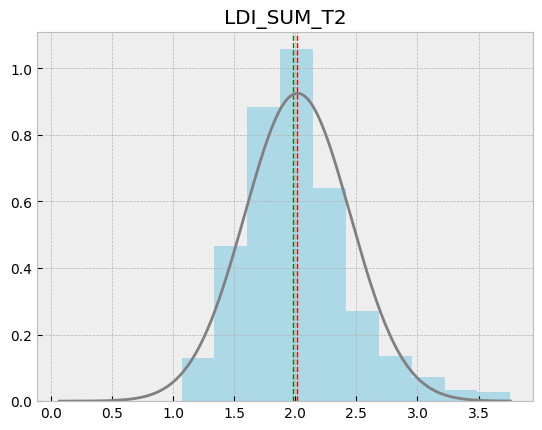

In [63]:
columns = df.columns.tolist()
exclude = ['ZIPCODE', 'GENDER', 'AGE_CAT']
for column in columns:
    if column not in exclude:
        y = df[column]
        plt.hist(y, density=True, color='lightblue')
        mean = y.mean()
        plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
        robust = y.median()
        plt.axvline(robust, color='g', linestyle='dashed', linewidth=1)
        x = np.linspace(y.min()-1, y.max(), 1000)
        mu, std = norm.fit(y)
        yr = norm.pdf(x, mu, std)
        plt.plot(x, yr, 'gray', linewidth=2)
        plt.title(column)
        plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ZIPCODE      677 non-null    int64  
 1   GENDER       677 non-null    int64  
 2   AGE_CAT      677 non-null    int64  
 3   AGE_T1       677 non-null    float64
 4   MWK_VAL      677 non-null    float64
 5   SCOR_VAL     677 non-null    float64
 6   MWK_NO_VAL   677 non-null    float64
 7   SCOR_NO_VAL  677 non-null    float64
 8   SPORTS_T1    677 non-null    float64
 9   LTE_SUM_T1   677 non-null    float64
 10  LDI_SUM_T1   677 non-null    float64
 11  LTE_SUM_T2   677 non-null    float64
 12  LDI_SUM_T2   677 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 68.9 KB


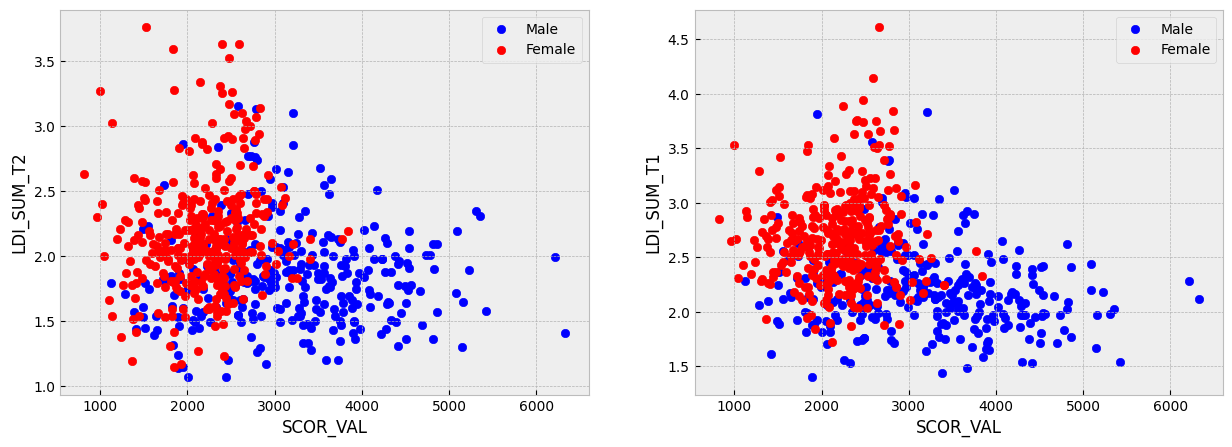

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume the data is stored in a pandas dataframe named "df"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot SCOR_VAL and SCOR_NO_VAL
male = df[df['GENDER'] == 1]
female = df[df['GENDER'] == 2]
ax1.scatter(male['SCOR_VAL'], male['LDI_SUM_T2'], c='blue', label='Male')
ax1.scatter(female['SCOR_VAL'], female['LDI_SUM_T2'], c='red', label='Female')
ax1.set_xlabel('SCOR_VAL')
ax1.set_ylabel('LDI_SUM_T2')
ax1.legend()

# Plot LTE_SUM_T1 and LTE_SUM_T2
ax2.scatter(male['SCOR_VAL'], male['LDI_SUM_T1'], c='blue', label='Male')
ax2.scatter(female['SCOR_VAL'], female['LDI_SUM_T1'], c='red', label='Female')
ax2.set_xlabel('SCOR_VAL')
ax2.set_ylabel('LDI_SUM_T1')
ax2.legend()

plt.show()


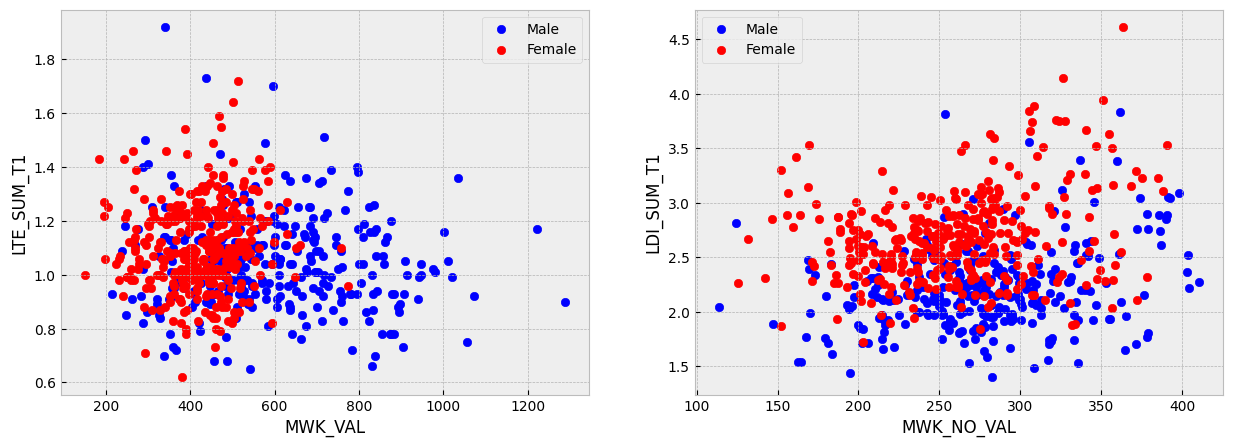

In [79]:
# Assume the data is stored in a pandas dataframe named "df"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot SCOR_VAL and SCOR_NO_VAL
male = df[df['GENDER'] == 1]
female = df[df['GENDER'] == 2]
ax1.scatter(male['MWK_VAL'], male['LTE_SUM_T1'], c='blue', label='Male')
ax1.scatter(female['MWK_VAL'], female['LTE_SUM_T1'], c='red', label='Female')
ax1.set_xlabel('MWK_VAL')
ax1.set_ylabel('LTE_SUM_T1')
ax1.legend()

# Plot LTE_SUM_T1 and LTE_SUM_T2
ax2.scatter(male['MWK_NO_VAL'], male['LDI_SUM_T1'], c='blue', label='Male')
ax2.scatter(female['MWK_NO_VAL'], female['LDI_SUM_T1'], c='red', label='Female')
ax2.set_xlabel('MWK_NO_VAL')
ax2.set_ylabel('LDI_SUM_T1')
ax2.legend()

plt.show()


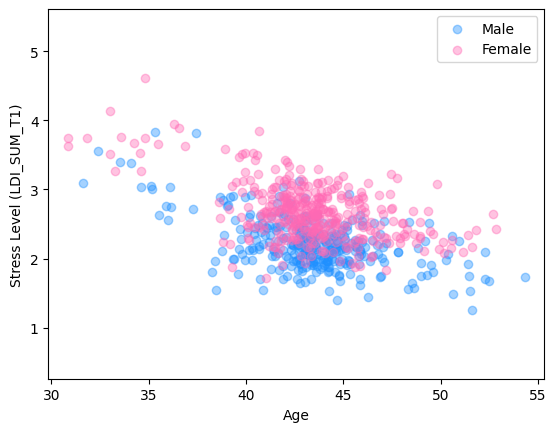

In [14]:
# Separate the data into male and female participants
male = df[df['GENDER'] == 1]
female = df[df['GENDER'] == 2]

# Plot the stress level (LDI_SUM_T1) against age (AGE_CAT) for male and female participants
plt.scatter(male['AGE_T1'], male['LDI_SUM_T1'], label='Male', alpha=0.4, color='dodgerblue')
plt.scatter(female['AGE_T1'], female['LDI_SUM_T1'], label='Female', alpha=0.4, color='hotpink')
# Set the x and y axis limits based on the minimum and maximum values of the data
plt.xlim(df['AGE_T1'].min() - 1, df['AGE_T1'].max() + 1)
plt.ylim(df['LDI_SUM_T1'].min() - 1, df['LDI_SUM_T1'].max() + 1)

# Add labels and a legend to the plot
plt.xlabel('Age')
plt.ylabel('Stress Level (LDI_SUM_T1)')
plt.legend()

# Show the plot
plt.show()


<AxesSubplot: xlabel='Stress level', ylabel='MWK_NO_VAL'>

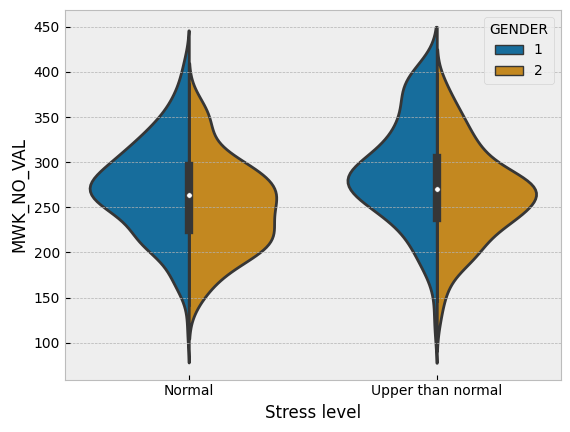

In [190]:
# The easiest way for plotting boxplot.
import seaborn as sns
male = df[df['GENDER'] == 1]
female = df[df['GENDER'] == 2]

df['Stress level'] = 'Normal'
df.loc[df['LDI_SUM_T2'] > 2, 'Stress level'] = 'Upper than normal'


#sns.boxplot(x='Stress level', y='MWK_NO_VAL', hue = 'GENDER', data=df)
sns.violinplot(x='Stress level', y='MWK_NO_VAL', hue = 'GENDER', palette='colorblind', data = df, split = True)
#order=['20 or less', '21 to 35', '36 to 50', '51 or more']

In [133]:
x = 'LDI_SUM_T1'
data_range = df[x].max() - df[x].min()
print (df[x].max(),  df[x].min())
print(data_range)
df[x].median()


4.61 1.4
3.2100000000000004


2.43

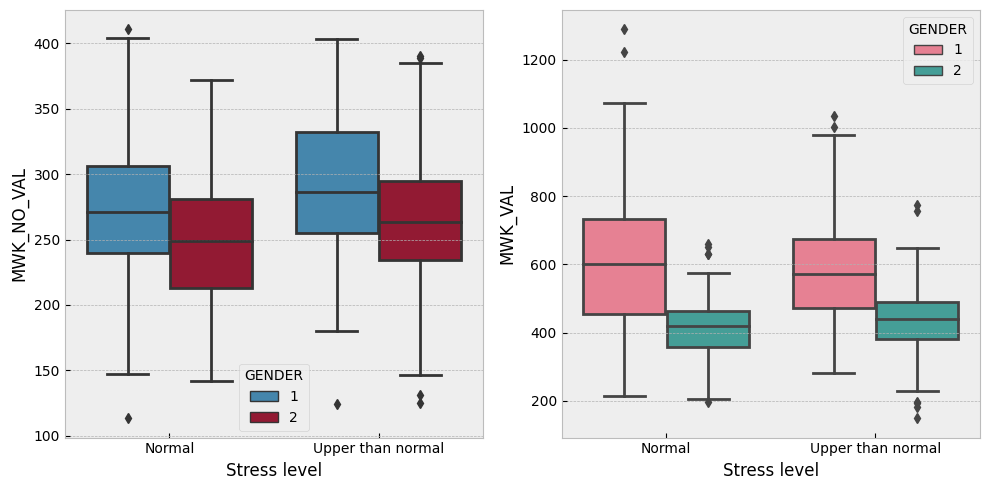

In [177]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

df['Stress level'] = 'Normal'
df.loc[df['LDI_SUM_T2'] > 2, 'Stress level'] = 'Upper than normal'

sns.boxplot(x='Stress level', y='MWK_NO_VAL',hue = 'GENDER', data=df, ax=ax1)
ax1.set_xlabel('Stress level')
ax1.set_ylabel('MWK_NO_VAL')

sns.boxplot(x='Stress level', y='MWK_VAL', data=df, palette='husl',hue = 'GENDER', ax=ax2)
ax2.set_xlabel('Stress level')
ax2.set_ylabel('MWK_VAL')

plt.tight_layout()
plt.show()

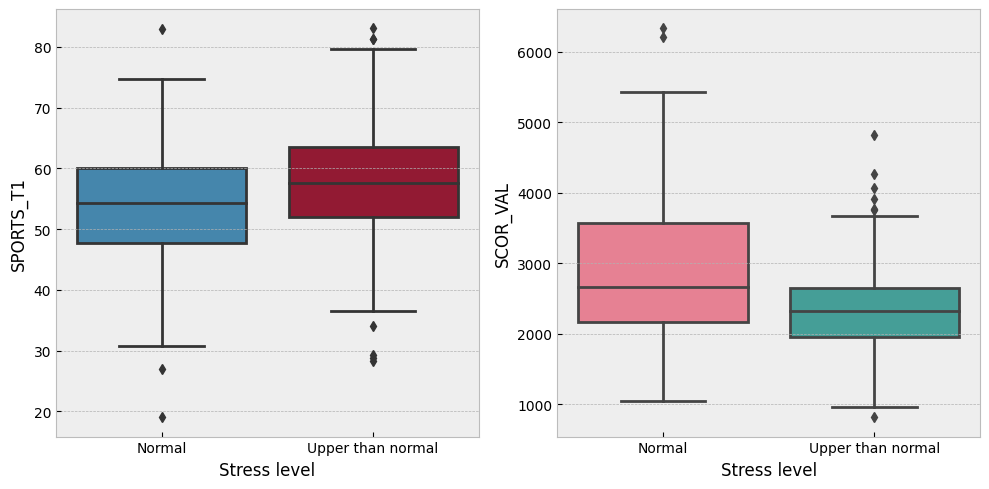

In [144]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

df['Stress level'] = 'Normal'
df.loc[df['LDI_SUM_T1'] > 2.5, 'Stress level'] = 'Upper than normal'

sns.boxplot(x='Stress level', y='SPORTS_T1', data=df, ax=ax1)
ax1.set_xlabel('Stress level')
ax1.set_ylabel('SPORTS_T1')

sns.boxplot(x='Stress level', y='SCOR_VAL', data=df, palette='husl', ax=ax2)
ax2.set_xlabel('Stress level')
ax2.set_ylabel('SCOR_VAL')

plt.tight_layout()
plt.show()

In [191]:
import ipywidgets as widgets
from IPython.display import display

def plot_selector(plot_type):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    
    

    if plot_type == 'LTE_SUM_T1':
        df['Stress level'] = 'Normal'
        df.loc[df['LTE_SUM_T1'] > 1.5, 'Stress level'] = 'Upper than normal'
        sns.boxplot(x='Stress level', y='SCOR_VAL', data=df,hue = 'GENDER',  palette='Set1',color='gray', ax=ax1)
        sns.boxplot(x='Stress level', y='SCOR_NO_VAL', data=df,hue = 'GENDER',  palette='Set2',color='gray', ax=ax2)
        ax1.set_xlabel('Stress level')
        ax1.set_ylabel('SCOR_NO_VAL')
        ax2.set_ylabel('SCOR_VAL')
    elif plot_type == 'LDI_SUM_T1':
        df['Stress level'] = 'Normal'
        df.loc[df['LDI_SUM_T1'] > 2.5, 'Stress level'] = 'Upper than normal'
        sns.boxplot(x='Stress level', y='SCOR_VAL', data=df, hue = 'GENDER', palette='Set1',color='gray', ax=ax1)
        sns.boxplot(x='Stress level', y='SCOR_NO_VAL', data=df, hue = 'GENDER', palette='Set2',color='gray', ax=ax2)
        ax2.set_xlabel('Stress level')
        ax1.set_ylabel('SCOR_NO_VAL')
        ax2.set_ylabel('SCOR_VAL')
    else: 
        pass

    plt.tight_layout()
    plt.show()

plot_select = widgets.Dropdown(
    options=['LTE_SUM_T1', 'LDI_SUM_T1'],
    value='LTE_SUM_T1',
    description='Plot Type:',
    disabled=False,
)

widgets.interact(plot_selector, plot_type=plot_select)
display()




interactive(children=(Dropdown(description='Plot Type:', options=('LTE_SUM_T1', 'LDI_SUM_T1'), value='LTE_SUM_…